## Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

Создание датафреймов:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = boston['data']
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
feature_names = boston['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = pd.DataFrame(data, columns=feature_names)
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
target = boston['target']
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [8]:
y = pd.DataFrame(target, columns=['price'])
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Разбиение датафреймов на тренировочные и тестовые:

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабирование данных:

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled =  pd.DataFrame(scaler.fit_transform(X_train), columns=[feature_names])
X_train_scaled.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
5,-0.385519,-0.500320,-0.523527,-0.278089,-0.540021,0.162452,-1.926178,0.755292,-0.507797,-0.705154,0.575794,0.408971,-1.038833
6,-0.402695,-0.500320,-0.841560,-0.278089,-0.352880,-0.393595,-1.218030,1.022793,-0.507797,-1.084748,0.845343,0.444180,-0.626249
7,-0.404845,3.175545,-1.487791,-0.278089,-1.246051,0.094710,-1.175112,2.527219,-0.857485,-0.548496,-0.457477,0.444180,-0.941672
8,1.305053,-0.500320,1.033237,-0.278089,1.561057,-0.231297,1.124581,-0.889790,1.706891,1.578434,0.845343,-3.793837,1.970358
9,1.221694,-0.500320,1.033237,-0.278089,0.344643,0.756603,1.124581,-1.100587,1.706891,1.578434,0.845343,-1.934525,1.031130


Построение модели TSNE:

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f"До:  {X_train_scaled.shape}")
print(f"Послe: {X_train_tsne.shape}")

До:  (404, 13)
Послe: (404, 2)


In [15]:
X_train_tsne[:10]

array([[ 28.13809  ,  18.375324 ],
       [ -9.785578 ,  -4.5355387],
       [-15.695753 , -17.543627 ],
       [ 37.924854 ,  13.517046 ],
       [ -8.786393 ,   3.9951665],
       [-13.988173 ,  -7.7626657],
       [-11.960751 ,  -7.4771976],
       [-18.704308 , -23.812914 ],
       [ 38.665813 ,  12.55771  ],
       [ 35.53426  ,  11.327715 ]], dtype=float32)

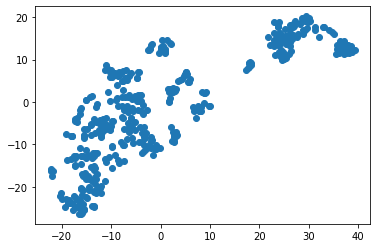

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

Кластеризация данных методом KMeans:

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [18]:
train_labels = model.fit_predict(X_train_tsne)
train_labels[:10]

array([1, 2, 0, 1, 2, 0, 0, 0, 1, 1], dtype=int32)

Построение диаграмм рассеяния:

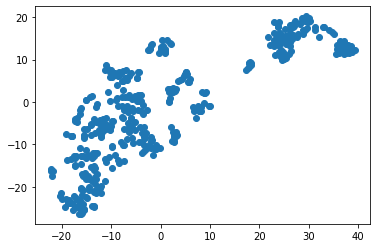

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [20]:
centers = model.cluster_centers_
centers

array([[-14.228865 , -14.676765 ],
       [ 28.28549  ,  14.416899 ],
       [ -2.4593158,   0.9745944]], dtype=float32)

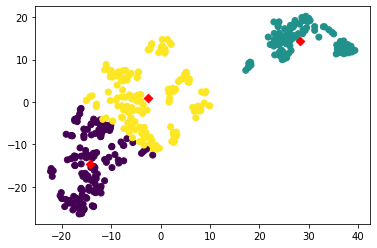

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

Вычисление средних:

In [22]:
X_train['CRIM'][train_labels == 0].mean()

0.09462279411764711

In [23]:
X_train['CRIM'][train_labels == 1].mean()

13.17982178217822

In [24]:
X_train['CRIM'][train_labels == 2].mean()

0.6829679640718564

In [25]:
y_train[train_labels == 0].mean()

price    26.564706
dtype: float64

In [26]:
y_train[train_labels == 1].mean()

price    16.277228
dtype: float64

In [27]:
y_train[train_labels == 2].mean()

price    23.670659
dtype: float64

### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Предобработка тестовых данных:

In [28]:
X_test_scaled =  pd.DataFrame(scaler.fit_transform(X_test), columns=[feature_names])

In [29]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne[:10]

array([[ -4.546597 , -19.609955 ],
       [  8.444319 , -27.986784 ],
       [ 18.658216 ,  12.060797 ],
       [-19.017591 , -32.90827  ],
       [ 34.072605 ,  18.886103 ],
       [ -8.192609 , -14.939208 ],
       [ -6.2852883,  -7.5936985],
       [ 18.096895 ,   6.409763 ],
       [ 42.19447  ,  19.335634 ],
       [ -1.4599202,  -6.5001273]], dtype=float32)

In [30]:
test_labels = model.predict(X_test_tsne)
test_labels[:10]

array([0, 0, 1, 0, 1, 0, 2, 1, 1, 2], dtype=int32)

Вычисление средних:

In [31]:
X_test['CRIM'][test_labels == 0].mean()

0.13352259999999996

In [32]:
X_test['CRIM'][test_labels == 1].mean()

10.13821

In [33]:
X_test['CRIM'][test_labels == 2].mean()

0.5201817647058824

In [34]:
y_test[test_labels == 0].mean()

price    25.844
dtype: float64

In [35]:
y_test[test_labels == 1].mean()

price    16.442857
dtype: float64

In [36]:
y_test[test_labels == 2].mean()

price    19.064706
dtype: float64